# Abalone Case Study

 Predicting the age of abalone from physical measurements

# Problem Statement

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

# Attribute Information

1. Sex, which indicates whether an abalone is male, female, or infant
2. Length, which is the longest dimension of the shell(mm)
3. Diameter, which is the dimension of the shell perpendicular to the length(mm) 
4. Height, which is the dimension of the body inside the shell(mm)
5. Whole weight, which is the weight of the entire abalone(grams)
6. Shucked weight, which is the weight of the abalone meat(grams)
7. Viscera weight, which is the weight of the abalone internal organs after bleeding(grams)
8. Shell weight, which is simply the weight of its shell after being dried(grams)
9. Rings, number of rings on the abalone shell,+1.5 gives the age.

# Objectives

* To predict the rings of each abalone which will lead us to the age of that abalone. 

# Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
#checking null values

df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
#checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Coverting Rings to Age

In [7]:
#Rings + 1.5 gives the age

df['age'] = df['Rings']+1.5
df.drop('Rings', axis = 1, inplace = True)

In [8]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


In [9]:
#describing the data

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


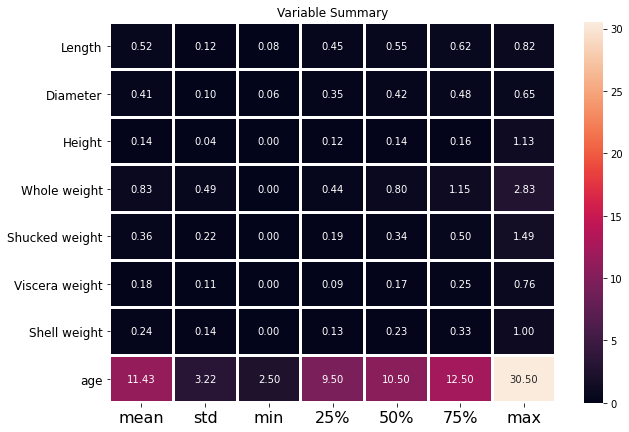

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

From the Above steps, we can analyse that:

* There are no missing values
* Datatypes are all numerical except for Sex
* Each variables have different scale(mm and grams), we can use standard scaler.
* No absolute zero value for min except for height

In [11]:
#check height is zero

df.loc[df['Height']==0.000]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


It may be outlier or not. We can find outliers and remove them

# Checking Distribution

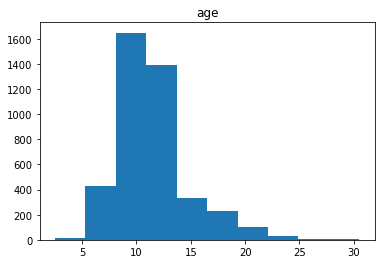

In [12]:
df["age"].hist(grid=False)
plt.title("age")
plt.show()

Most of the data lies between 6 to 13

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

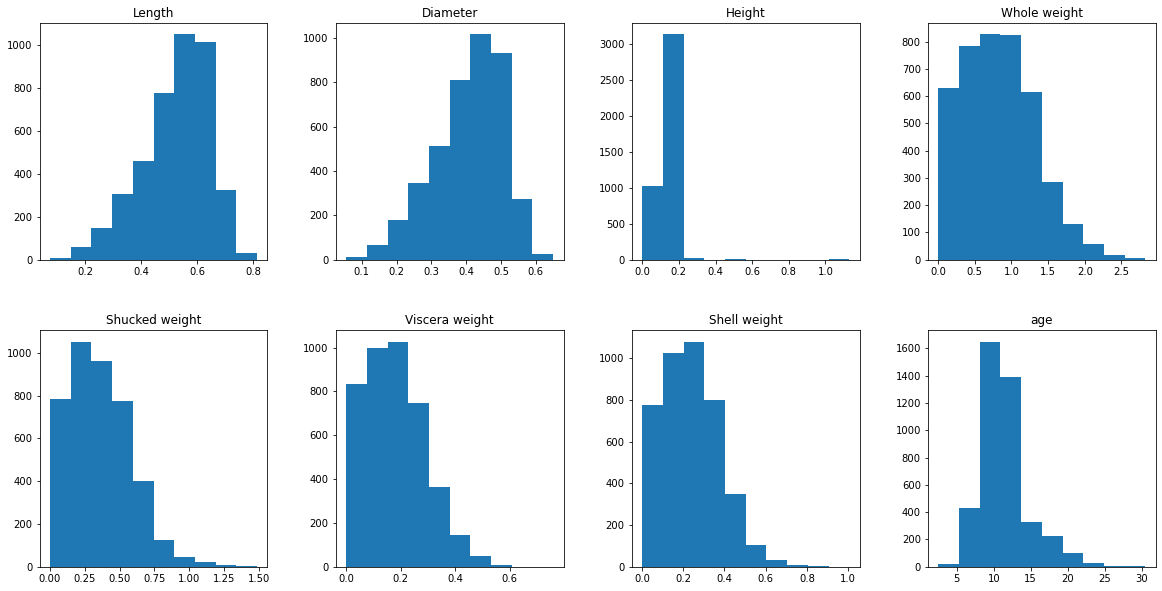

In [13]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 10)

The datas are not normalised. but close

<AxesSubplot:xlabel='Sex', ylabel='count'>

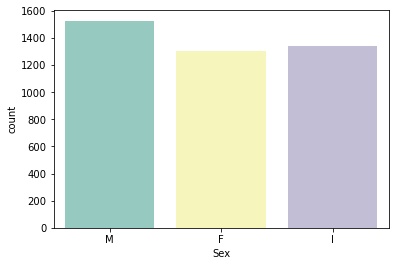

In [14]:
sns.countplot(x = 'Sex', data = df, palette="Set3")

<AxesSubplot:xlabel='Sex', ylabel='age'>

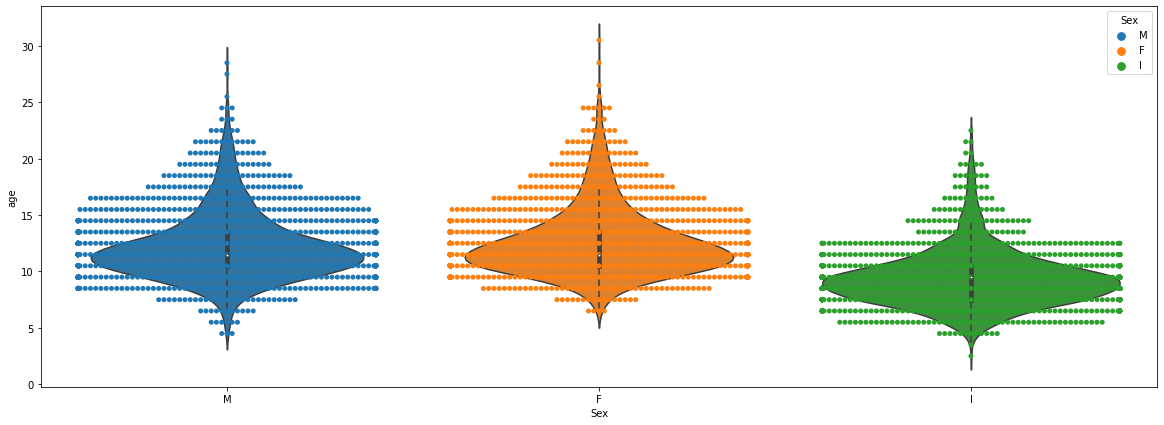

In [15]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = df)

# Most of the Data is distributed between ages 8 to 18 for Male and Female and 5 to 13 for Infant abalones

In [16]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304


<AxesSubplot:xlabel='Sex', ylabel='age'>

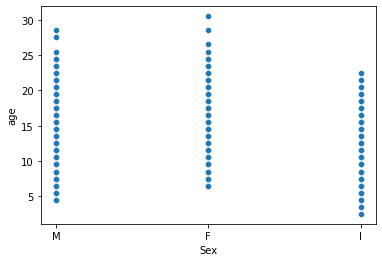

In [17]:
sns.scatterplot(x='Sex',y='age',data=df)

According to the data provided:
    
* Max Age for male is 28.5 and max age of Female is 30.5. max age of Infant is 22.5
* Min Age for male is 4.5 and min age of female is 6.5 and min age of Infant is 2.5

In [18]:
lencode=LabelEncoder()
df['Sex']=lencode.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [19]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

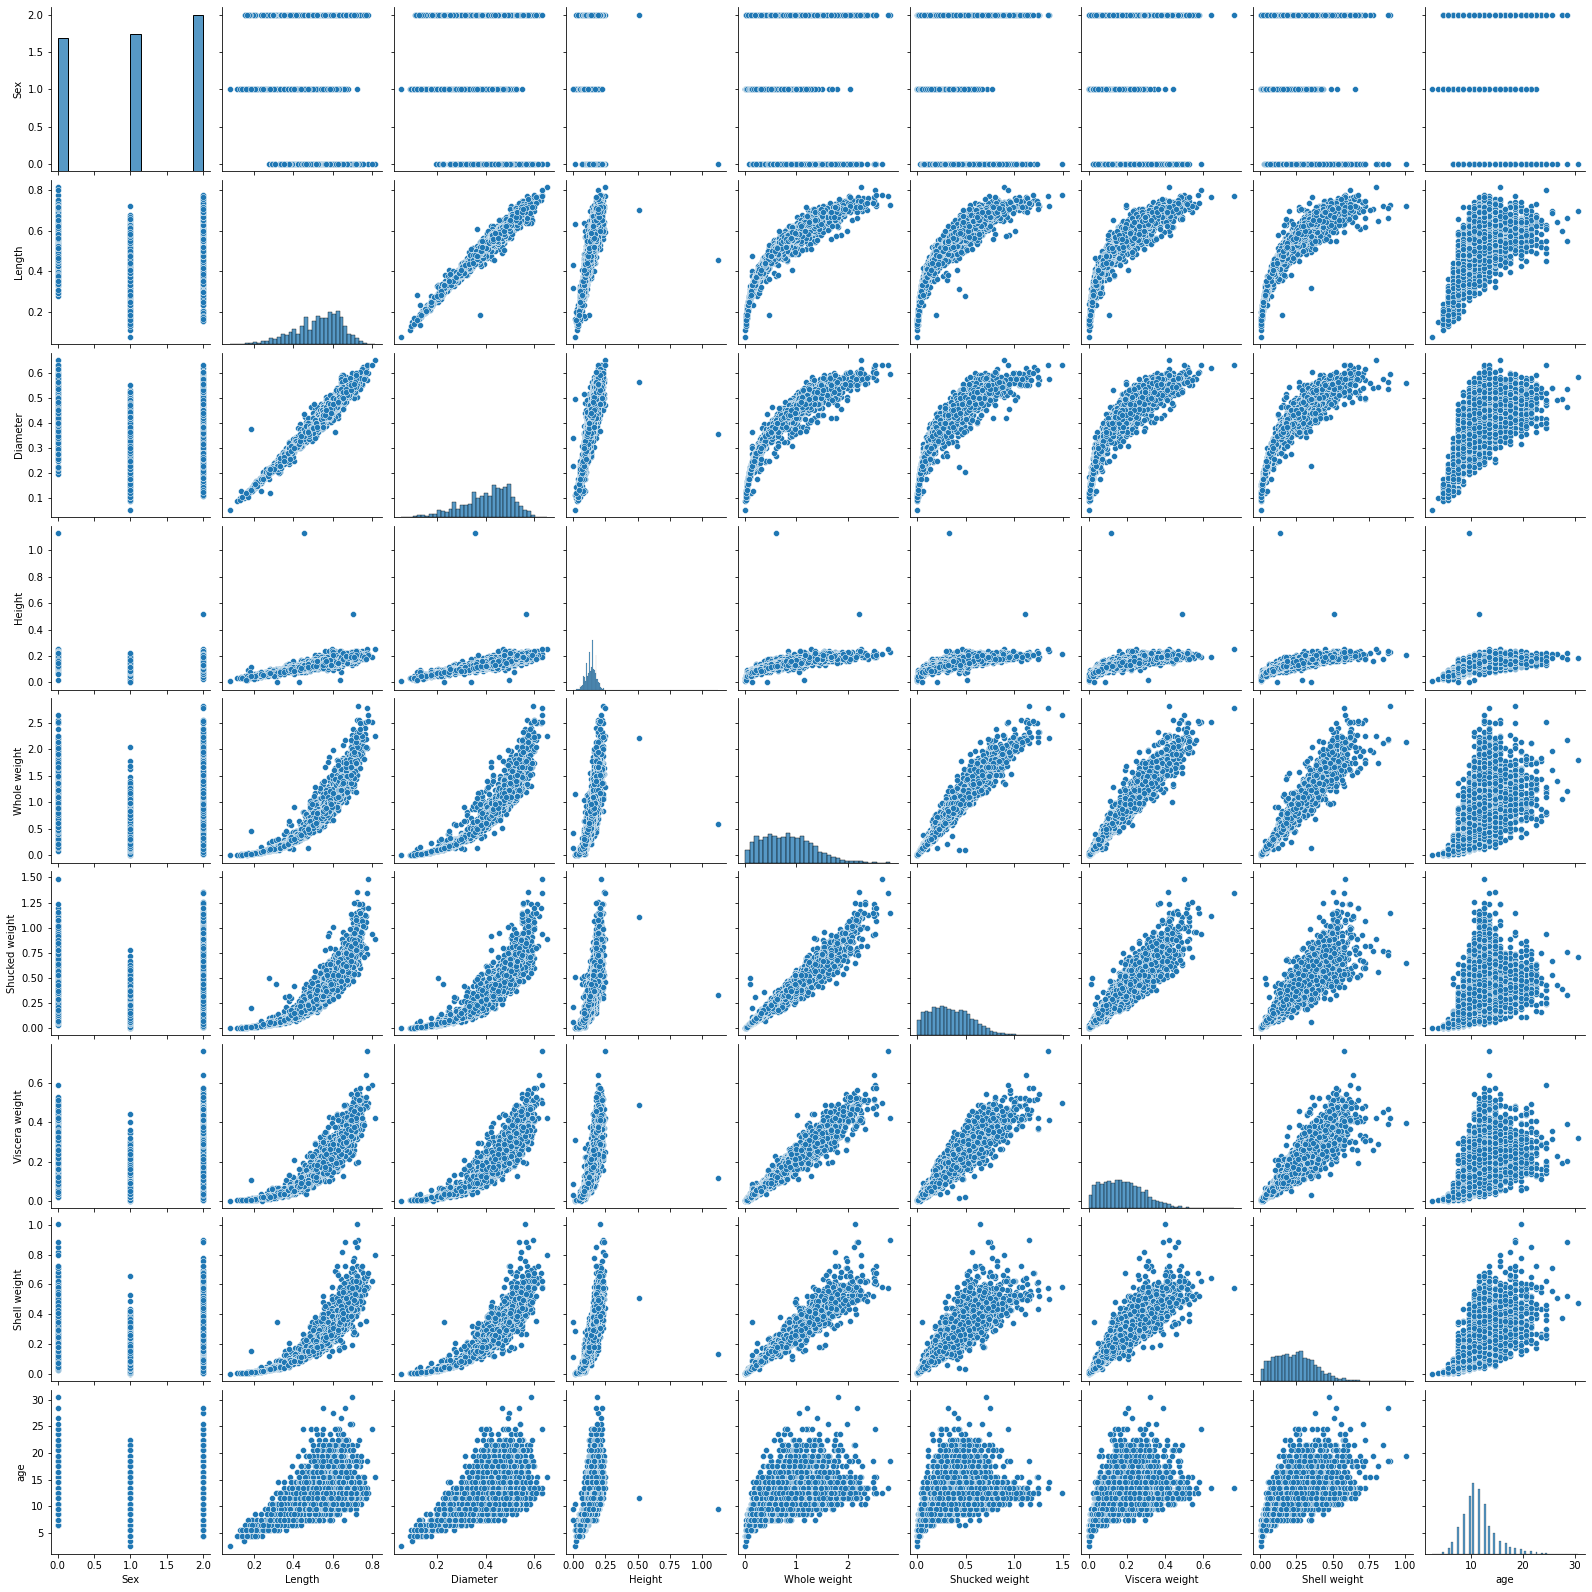

In [20]:
sns.pairplot(df)

From the above we can see that the variables are highly correlated with each other. We can see positive correlation between the features and the target. We can confirm with a heat map.

# Finding Correlation

In [21]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

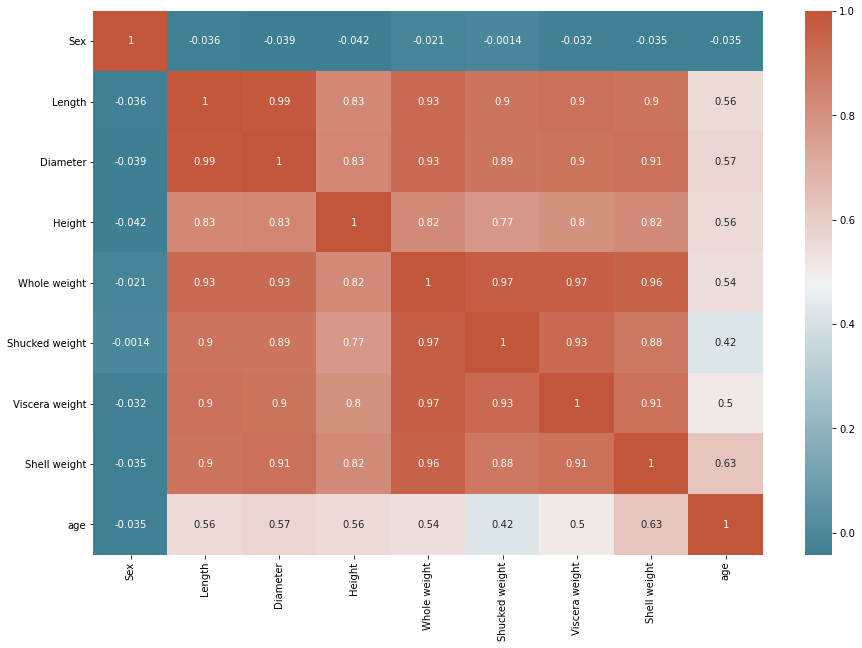

In [22]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Correlation with age:
Accordingly sex has least correlation-0.035. Max correlation with age is shell weight with 63% and then comes Diameter with 57% followed by length and Height 56% followed by Whole weight with 54% and viscera weight of 50% and shucked weight of 42%.

Correlation between variables:
Accordingly correlation between length and diameter is very high at 99% followed by whole weight with shucked and viscera weight at 97%. we have 96% correlation between whole weight and shell weight.

Altogether we can see all the variable except for sex are highly correlated with each other. this shows that we have high multicollinearity between features and so we can find VIF Factor and resolve accordingly.

In [23]:
Correlation=df.corr()
Correlation['age'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
age               1.000000
Name: age, dtype: float64

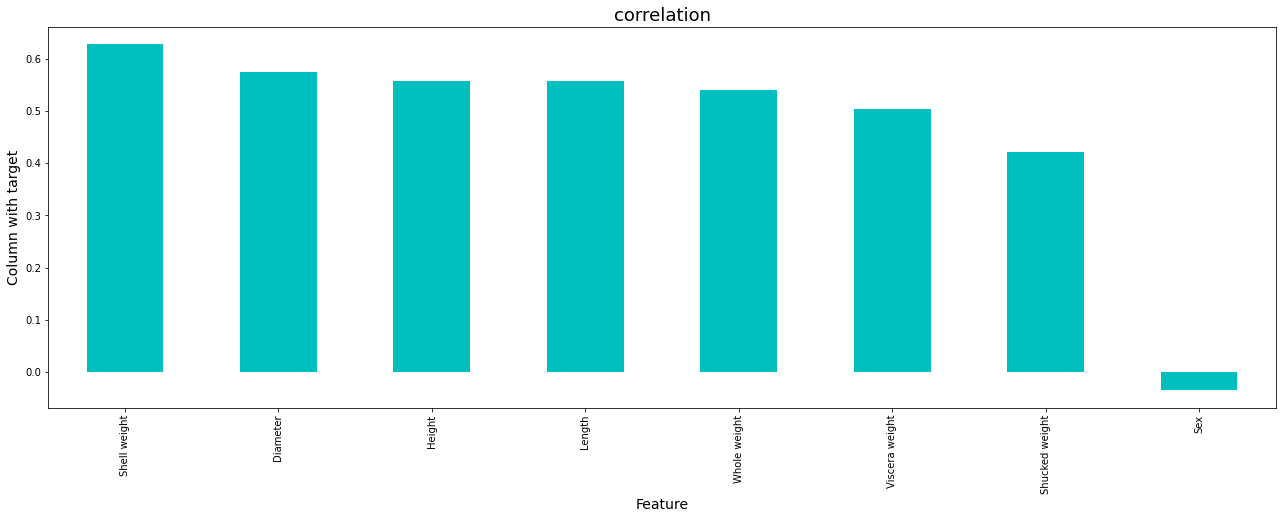

In [24]:
plt.figure(figsize=(22,7))
df.corr()['age'].sort_values(ascending=False).drop(['age']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

Except for sex, we have positive and moderate correlation with other features

# Standardising the Data

before scaling we can split the data to features and target

In [25]:
x=df.iloc[:,1:-1]
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [26]:
y=df.iloc[:,-1]
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [27]:
X = StandardScaler().fit_transform(x)

In [28]:
X

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [29]:
X.shape

(4177, 7)

In [30]:
dfS=pd.DataFrame(X,columns=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"])
dfS.tail()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739
4176,1.549052,1.482634,1.326659,2.283681,2.640993,1.787449,1.840481


In [31]:
dfS.insert(0,'Sex',df['Sex'].values)

In [32]:
dfS.head(2)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,2,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987


In [33]:
dfS['age']=df['age'].values

In [34]:
dfS.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,16.5
1,2,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,8.5
2,0,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,10.5
3,2,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,11.5
4,1,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,8.5


# Checking Outliers

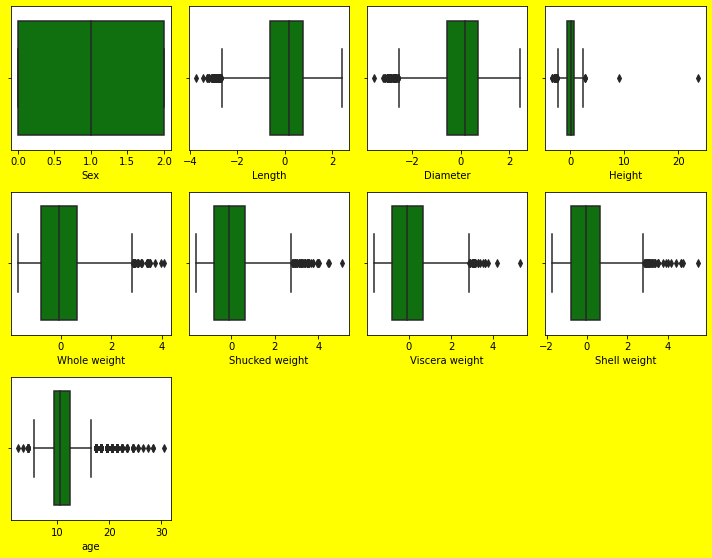

In [35]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in dfS:

    plt.subplot(4,4,graph)

    sns.boxplot(dfS[column],color='green',orient='v')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


From the above we can see that there are outliers present in almost all features except for sex. We can use Z-score method and remove outliers.
* Sex- no outliers
* Length- Alot of outliers
* Diameter- Alot of outliers
* Height- Few outliers
* whole weight- Alot of outliers
* shucked weight- Alot of outliers
* viscera weight- Alot of outliers
* shell weight- Alot of outliers


In [36]:
from scipy.stats import zscore

z=np.abs(zscore(dfS))
z.shape

(4177, 9)

In [37]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [38]:
df_new=dfS[(z<3).all(axis=1)]
print(dfS.shape)
print(df_new.shape)

(4177, 9)
(4027, 9)


In [39]:
losspercent=(4177-4027)/4177*100
losspercent

3.5910940866650707

since the loss percentage is low, we can remove the outliers

# Skewness

In [40]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
age               0.725464
dtype: float64

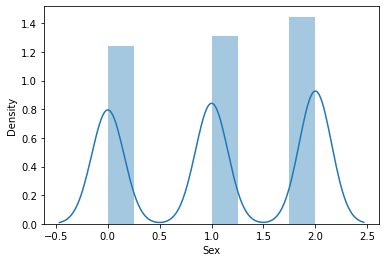

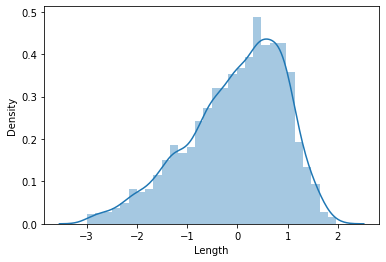

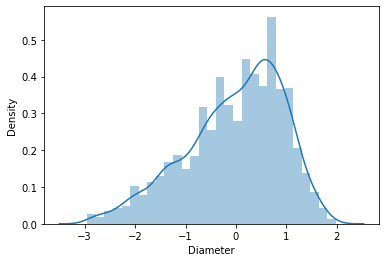

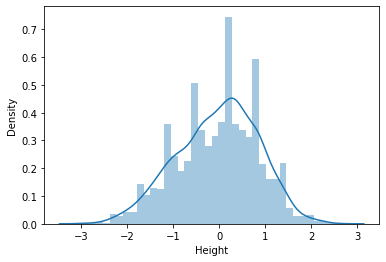

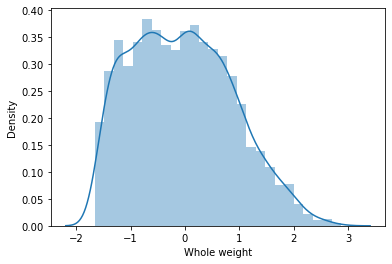

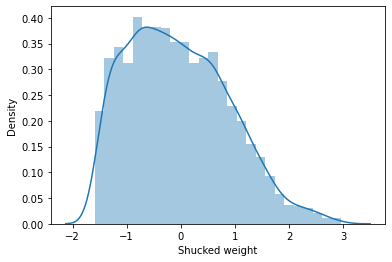

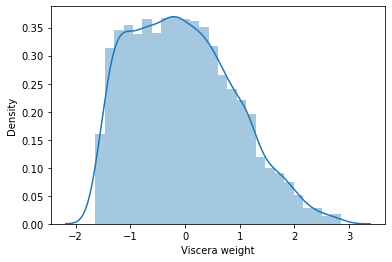

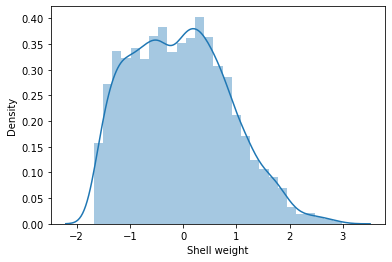

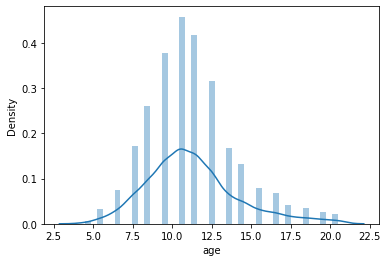

In [41]:
for i in df_new.columns:
    plt.figure()
    sns.distplot(df_new[i])

Even though all the variables are not exactly normalised, they are somewhat normalised. So we are skipping removal of skewness for this model.

# Multicollinearity

In [42]:
dfx=dfS.iloc[:,:-1]
dfx

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,2,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,2,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,1,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,0,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,2,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,2,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [43]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    vif["features"]=dfx.columns
    print(vif)

In [44]:
vif_calc()

   VIF Factor        features
0    1.003981             Sex
1   40.771869          Length
2   41.850302        Diameter
3    3.560295          Height
4  109.593066    Whole weight
5   28.383891  Shucked weight
6   17.354113  Viscera weight
7   21.258339    Shell weight


since the VIF Factor is high for Length, Diameter,Whole weight and shicked weight we can remove the columns shucked weight and length.
* shucked weight and whole weight is highly corelated with 97%
* Shecked weight has comparitively lower correlation with target variable at 42%
* Length and Diameter are higly corelated with 99%

In [45]:
dfV=dfS.drop(['Length','Shucked weight'],axis=1)
dfV.head()

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight,age
0,2,-0.432149,-1.064424,-0.641898,-0.726212,-0.638217,16.5
1,2,-1.439929,-1.183978,-1.230277,-1.205221,-1.212987,8.5
2,0,0.122130,-0.107991,-0.309469,-0.356690,-0.207139,10.5
3,2,-0.432149,-0.347099,-0.637819,-0.607600,-0.602294,11.5
4,1,-1.540707,-1.423087,-1.272086,-1.287337,-1.320757,8.5


In [46]:
dfx=dfV.iloc[:,:-1]

In [47]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(dfx.values,i) for i in range(dfx.shape[1])]
    vif["features"]=dfx.columns
    print(vif)

In [48]:
vif_calc()

   VIF Factor        features
0    1.002880             Sex
1    8.103787        Diameter
2    3.553778          Height
3   33.979181    Whole weight
4   16.019687  Viscera weight
5   12.826967    Shell weight


Multicollinearity is reduced and now we can proceed with Data Modelling

# Data Modelling

OUR MODEL IS FREE OF OUTLIERS, SKEWNESS IS OK, AND LESS VIF FACTOR

In [49]:
x=dfV.iloc[:,:-1]
y=dfV.iloc[:,-1]

In [50]:
x

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,-0.432149,-1.064424,-0.641898,-0.726212,-0.638217
1,2,-1.439929,-1.183978,-1.230277,-1.205221,-1.212987
2,0,0.122130,-0.107991,-0.309469,-0.356690,-0.207139
3,2,-0.432149,-0.347099,-0.637819,-0.607600,-0.602294
4,1,-1.540707,-1.423087,-1.272086,-1.287337,-1.320757
...,...,...,...,...,...,...
4172,0,0.424464,0.609334,0.118813,0.532900,0.073062
4173,2,0.323686,-0.107991,0.279929,0.309362,0.155685
4174,2,0.676409,1.565767,0.708212,0.975413,0.496955
4175,0,0.777187,0.250672,0.541998,0.733627,0.410739


In [51]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [53]:
x_train.shape

(3258, 6)

In [54]:
x_test.shape

(919, 6)

In [55]:
y_train.shape

(3258,)

In [56]:
y_test.shape

(919,)

In [57]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [58]:
lm.score(x_train,y_train)

0.4610005699068134

In [59]:
pred=lm.predict(x_test)

In [60]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.748673244569291
Mean squared error: 5.8682938315407815
Root Mean squared Error: 2.422456156784015


In [61]:
print(r2_score(y_test,pred))

0.4460900986371549


In [103]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lm,x,y,cv=3)
print(score)
print(score.mean())

[0.43838787 0.37902754 0.39882555]
0.4054136525738848


# Accordingly, we get the score of 46%, Mean squared error of 5.86 and cross val score at 40%. This is Comparitively very less. This maybe due to the high correlation among the variables. we tried to reduce the multicolinearity as much as possible. Lets find the score with other regression techniques

In [63]:
param  = {'alpha':[0.0001,0.001,0.01, 0.1, 1,10,100]}
rd = GridSearchCV(estimator = Ridge(random_state=10,),param_grid = param,scoring= 'r2' ,cv = 5)
rd.fit(x_train, y_train)
rd.best_params_, rd.best_score_

({'alpha': 0.0001}, 0.44465465926419334)

In [64]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.4610005699067271

In [65]:
score=cross_val_score(rd,x,y,cv=3)
print(score)
print(score.mean())

[0.43838783 0.37902753 0.39882562]
0.4054136623651961


# Here also, ridge score is 46% and cv score comes aroung 40%

In [66]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.43064019230271144
0.37430374344829354
0.5021812626045298


In [67]:
sv=SVR(kernel='rbf')
sv.fit(x_train,y_train)    
print(sv.score(x_train,y_train))

0.5021812626045298


In [68]:
score=cross_val_score(sv,x,y,cv=4)
print(score)
print(score.mean())

[0.32410729 0.41822984 0.50840292 0.47676542]
0.43187636711123556


In [69]:
pred=sv.predict(x_test)

In [70]:
print(r2_score(y_test,pred))

0.47198476338031314


In [71]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.5924009937856198
Mean squared error: 5.593957696714134
Root Mean squared Error: 2.3651548990952227


# In SVR, we get a model score of 50% at kernel=rbf and cross val score os 43%.

In [109]:
knn = KNeighborsRegressor()
param  = {'n_neighbors':list(range(1,51))}
knn_grid = GridSearchCV(estimator= knn,param_grid = param,scoring='r2',cv = 5)
knn_grid.fit(x_train, y_train)
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 16}, 0.4711083602806017)

In [110]:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(x_train, y_train)
knn.score(x_train,y_train)

0.5394409535557942

In [74]:
score=cross_val_score(knn,x,y,cv=3)
print(score)
print(score.mean())

[0.42888376 0.48385759 0.45805872]
0.4569333565136715


In [75]:
pred=knn.predict(x_test)
print(r2_score(y_test,pred))

0.4902678504994724


In [76]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.6030331882480957
Mean squared error: 5.400260983405876
Root Mean squared Error: 2.3238461617340067


# the KNN gives the score of 53% and cv score of 45%

In [77]:
n_estimators=[5,10,15,20,25,30,40,50,75,100]
param_grid=dict(n_estimators=n_estimators)
model=RandomForestRegressor()
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring='r2',cv=10)
grid_result=grid.fit(x_train,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.478306 using {'n_estimators': 100} 


In [78]:
rdr=RandomForestRegressor(n_estimators=75)
rdr.fit(x_train, y_train)
rdr.score(x_train, y_train)

0.9262520139560466

In [104]:
score=cross_val_score(rdr,x,y,cv=3)
print(score)
print(score.mean())

[0.48277894 0.46043115 0.38373209]
0.4423140596844477


In [80]:
pred=rdr.predict(x_test)
print(r2_score(y_test,pred))

0.49293814245049405


In [81]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 1.656829887558941
Mean squared error: 5.371971079675975
Root Mean squared Error: 2.317751298063702


# This model has some issues as the score is 92% but the cross val score is very less

# Model without removing outliers

In [82]:
dfS

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,16.5
1,2,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,8.5
2,0,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,10.5
3,2,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,11.5
4,1,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,12.5
4173,2,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,11.5
4174,2,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,10.5
4175,0,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,11.5


In [83]:
#to reduce multicollinearity we can drop shucked weight and length

dfS.drop(['Length','Shucked weight'],axis=1,inplace=True)

In [84]:
X=dfS.iloc[:,:-1]
X

,Sex,Diameter,Height,Whole weight,Viscera weight,Shell weight
0,2,-0.432149,-1.064424,-0.641898,-0.726212,-0.638217
1,2,-1.439929,-1.183978,-1.230277,-1.205221,-1.212987
2,0,0.122130,-0.107991,-0.309469,-0.356690,-0.207139
3,2,-0.432149,-0.347099,-0.637819,-0.607600,-0.602294
4,1,-1.540707,-1.423087,-1.272086,-1.287337,-1.320757
...,...,...,...,...,...,...
4172,0,0.424464,0.609334,0.118813,0.532900,0.073062
4173,2,0.323686,-0.107991,0.279929,0.309362,0.155685
4174,2,0.676409,1.565767,0.708212,0.975413,0.496955
4175,0,0.777187,0.250672,0.541998,0.733627,0.410739


In [85]:
Y=dfS.iloc[:,-1:]
Y

,age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5
...,...
4172,12.5
4173,11.5
4174,10.5
4175,11.5


In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=44)

In [87]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [88]:
lm.score(X_train,Y_train)

0.46185272090701

In [89]:
pred=lm.predict(X_test)
print('error:')

print('Mean absolute error:',mean_absolute_error(Y_test,pred))
print('Mean squared error:',mean_squared_error(Y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(Y_test,pred)))

error:
Mean absolute error: 1.748608697361953
Mean squared error: 6.022553488012471
Root Mean squared Error: 2.454089136118016


In [90]:
print(r2_score(Y_test,pred))

0.44638369813750556


In [91]:
score=cross_val_score(lm,X,Y,cv=3)
print(score)
print(score.mean())

[0.43838787 0.37902754 0.39882555]
0.4054136525738848


In [92]:
param  = {'alpha':[0.0001,0.001,0.01, 0.1, 1,10,100]}
rd = GridSearchCV(estimator = Ridge(random_state=10,),param_grid = param,scoring= 'r2' ,cv = 5)
rd.fit(X_train, Y_train)
rd.best_params_, rd.best_score_

({'alpha': 0.0001}, 0.4376285150547964)

In [93]:
rd=Ridge(alpha=0.0001)
rd.fit(X_train,Y_train)
rd.score(X_train,Y_train)

0.4618527209069454

In [94]:
score=cross_val_score(rd,X,Y,cv=3)
print(score)
print(score.mean())

[0.43838783 0.37902753 0.39882562]
0.4054136623651961


In [106]:
knno = KNeighborsRegressor()
param  = {'n_neighbors':list(range(1,51))}
knn_grid = GridSearchCV(estimator= knno,param_grid = param,scoring='r2',cv = 5)
knn_grid.fit(X_train, Y_train)
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 13}, 0.47709305525952167)

In [107]:
knno= KNeighborsRegressor(n_neighbors=13)
knno.fit(X_train, Y_train)
knno.score(X_train,Y_train)

0.554645529521109

In [108]:
score=cross_val_score(knno,X,Y,cv=3)
print(score)
print(score.mean())

[0.42892612 0.48220055 0.45100349]
0.4540433851519727


# Saving the best model

In [111]:
#from both model with and without outliers, we can use knn as best model and save it

import joblib

joblib.dump(knn,'knnfileA.obj')    #save the best model when dtcG=.22

knn_from_joblib=joblib.load('knnfileA.obj')    #load the model

knn_from_joblib.predict(x_test)   #to make predictions

array([12.    , 10.6875, 13.5625, 11.4375, 13.9375, 10.3125, 10.5625,
       10.1875,  8.1875, 12.125 , 13.3125,  8.75  , 13.875 ,  8.9375,
       10.125 , 13.625 , 13.375 , 10.3125, 14.625 ,  9.6875, 17.4375,
       12.375 , 12.6875, 12.1875, 10.75  ,  9.0625, 10.9375,  9.75  ,
       11.625 , 13.25  , 12.875 , 11.75  ,  8.375 , 12.75  , 10.5625,
       11.625 ,  7.8125,  5.1875, 10.375 ,  8.4375, 13.4375, 17.625 ,
       11.5625, 10.125 , 11.125 , 13.1875, 11.5625, 11.1875, 14.    ,
        6.75  ,  8.125 , 14.8125,  9.9375,  5.5625,  8.0625, 12.125 ,
       11.625 , 14.375 , 11.625 , 10.4375, 13.1875, 14.9375, 11.3125,
        8.5625,  9.4375, 12.6875,  6.125 ,  8.625 , 10.0625, 12.75  ,
       12.5   , 13.375 , 11.75  , 10.3125, 10.0625, 12.375 , 15.0625,
       12.4375, 11.8125, 11.125 , 13.5   , 12.4375, 11.8125,  9.4375,
        8.3125, 12.9375, 11.625 , 10.5   , 12.4375, 13.9375, 11.5   ,
       12.375 , 12.0625, 12.75  , 12.4375, 10.625 ,  8.5   , 11.5625,
       13.5   ,  8.3

In [112]:
import pickle

filename='pickledtcfileA.pkl'
pickle.dump(knn,open(filename,'wb'))

loaded_model= pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([12.    , 10.6875, 13.5625, 11.4375, 13.9375, 10.3125, 10.5625,
       10.1875,  8.1875, 12.125 , 13.3125,  8.75  , 13.875 ,  8.9375,
       10.125 , 13.625 , 13.375 , 10.3125, 14.625 ,  9.6875, 17.4375,
       12.375 , 12.6875, 12.1875, 10.75  ,  9.0625, 10.9375,  9.75  ,
       11.625 , 13.25  , 12.875 , 11.75  ,  8.375 , 12.75  , 10.5625,
       11.625 ,  7.8125,  5.1875, 10.375 ,  8.4375, 13.4375, 17.625 ,
       11.5625, 10.125 , 11.125 , 13.1875, 11.5625, 11.1875, 14.    ,
        6.75  ,  8.125 , 14.8125,  9.9375,  5.5625,  8.0625, 12.125 ,
       11.625 , 14.375 , 11.625 , 10.4375, 13.1875, 14.9375, 11.3125,
        8.5625,  9.4375, 12.6875,  6.125 ,  8.625 , 10.0625, 12.75  ,
       12.5   , 13.375 , 11.75  , 10.3125, 10.0625, 12.375 , 15.0625,
       12.4375, 11.8125, 11.125 , 13.5   , 12.4375, 11.8125,  9.4375,
        8.3125, 12.9375, 11.625 , 10.5   , 12.4375, 13.9375, 11.5   ,
       12.375 , 12.0625, 12.75  , 12.4375, 10.625 ,  8.5   , 11.5625,
       13.5   ,  8.3